In [344]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [345]:
os.getcwd()

'C:\\Users\\Interventoria\\Desktop\\Daniel cursos\\Data_Analyst\\Python\\Proyects\\Credit_data_set'

In [346]:
os.chdir('C:\\Users\\Interventoria\\Desktop\\Daniel cursos\\Data_Analyst\\Python\\Proyects\\Credit_data_set')

In [347]:
os.listdir()

['Count of Applicants in Each Housing Category by Risk.jpg',
 'Count of Applicants Job Category by Risk.jpg',
 'Count of Credit distribution.jpg',
 'Count of Risk by Age.jpg',
 'Credit Amount and Count by Purpose.jpg',
 'Credit distribution by Age category.jpg',
 'Credit distribution by Job category.jpg',
 'Distribution of Risk Density.jpg',
 'Distribution of Risk Levels.jpg',
 'german_credit_data.csv']

In [348]:
df=pd.read_csv('german_credit_data.csv')
df = df.drop(columns=["Unnamed: 0"])
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


## Exploratory data analysis

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [350]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [351]:
columns = df.columns.to_list()
for col in columns:
    unique_values = df[col].unique()
    numeric = pd.api.types.is_numeric_dtype(df[col])
    print(f"{col} ({df[col].dtype})")
#make sure to not print all values    
    if numeric:
        unique_values = np.sort(unique_values)
        
    if numeric and len(unique_values) > 20:
        print(unique_values[:10], " ... ", unique_values[-10:])
    else:
        print(unique_values)
        
    print("\n")

Age (int64)
[19 20 21 22 23 24 25 26 27 28]  ...  [62 63 64 65 66 67 68 70 74 75]


Sex (object)
['male' 'female']


Job (int64)
[0 1 2 3]


Housing (object)
['own' 'free' 'rent']


Saving accounts (object)
[nan 'little' 'quite rich' 'rich' 'moderate']


Checking account (object)
['little' 'moderate' nan 'rich']


Credit amount (int64)
[250 276 338 339 343 362 368 385 392 409]  ...  [14318 14421 14555 14782 14896 15653 15672 15857 15945 18424]


Duration (int64)
[ 4  5  6  7  8  9 10 11 12 13]  ...  [36 39 40 42 45 47 48 54 60 72]


Purpose (object)
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


Risk (object)
['good' 'bad']




In [352]:
df["Saving accounts"] = df["Saving accounts"].fillna("none")
df["Checking account"] = df["Checking account"].fillna("none")
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,none,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,none,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,none,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,none,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [353]:
df["Job"] = df["Job"].map({
    0: "unskilled and non-resident",
    1: "unskilled and resident",
    2: "skilled",
    3: "highly skilled"
})


# Analysis

In [354]:
sns.set_style('darkgrid')

In [355]:
os.listdir()

['Count of Applicants in Each Housing Category by Risk.jpg',
 'Count of Applicants Job Category by Risk.jpg',
 'Count of Credit distribution.jpg',
 'Count of Risk by Age.jpg',
 'Credit Amount and Count by Purpose.jpg',
 'Credit distribution by Age category.jpg',
 'Credit distribution by Job category.jpg',
 'Distribution of Risk Density.jpg',
 'Distribution of Risk Levels.jpg',
 'german_credit_data.csv']

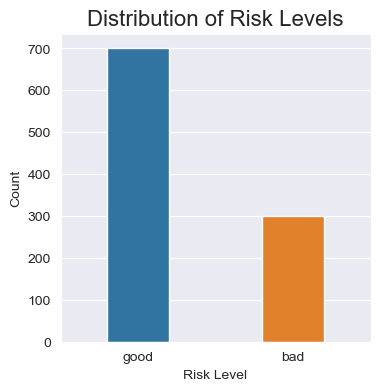

In [356]:
# Get the value counts of the 'Risk' column
x = df['Risk'].value_counts().index

# Get the corresponding counts
y = df['Risk'].value_counts()

plt.figure(figsize=(4,4))

# Plot the bar chart
sns.barplot(data=df, x=x, y=y, width=0.4)

# Adding labels and title
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Distribution of Risk Levels', size=16)


plt.savefig('Distribution of Risk Levels.jpg', format='jpg', dpi=100,bbox_inches='tight')
# Show the plot
plt.show()


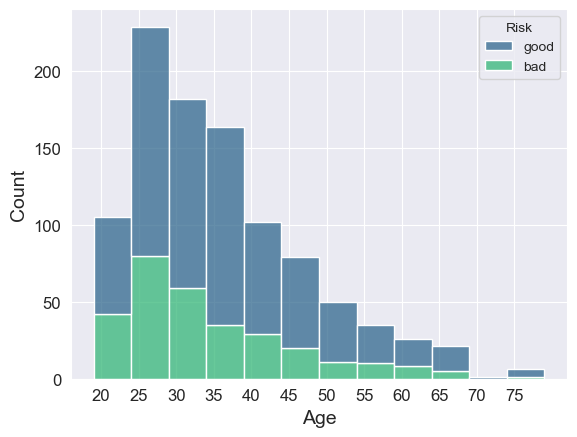

In [380]:
sns.histplot(data=df, x='Age', hue='Risk', palette='viridis', multiple="stack", binwidth=5)
plt.xticks(range(20, df['Age'].max() + 5, 5))

plt.savefig('Count of Risk by Age.jpg', format='jpg', dpi=100,bbox_inches='tight')

plt.ylabel('Count',size=14)
plt.xlabel('Age',size=14)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [358]:
df_good=df[df.Risk=='good']
df_bad=df[df.Risk=='bad']

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_16072\2729816905.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_good.Age, color='g', label='Good Risk', ax=ax)
C:\Users\Interventoria\AppData\Local\Temp\ipykernel_16072\2729816905.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_b

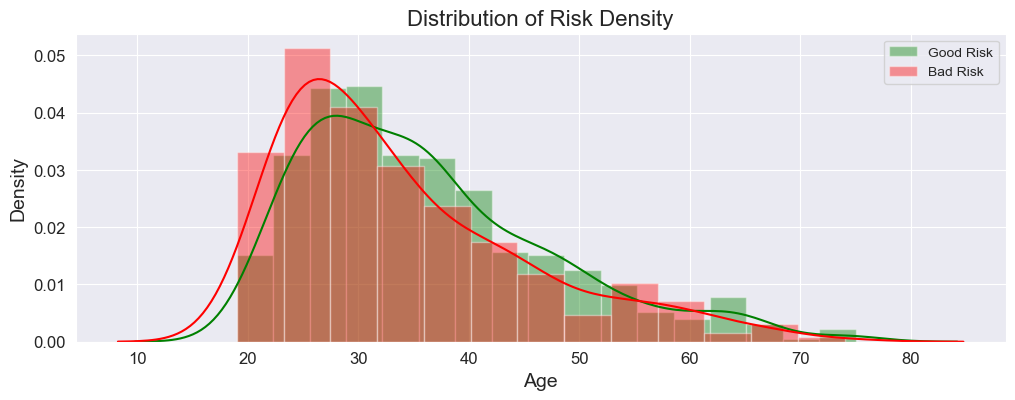

In [379]:
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the distribution for 'good' with green color
sns.distplot(df_good.Age, color='g', label='Good Risk', ax=ax)

# Plot the distribution for 'bad' with red color
sns.distplot(df_bad.Age, color='r', label='Bad Risk', ax=ax)

# Adding labels and title
plt.title('Distribution of Risk Density', size=16)

# Add a legend
plt.legend()

plt.ylabel('Density',size=14)
plt.xlabel('Age',size=14)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

fig.savefig('Distribution of Risk Density.jpg', format='jpg', dpi=100,bbox_inches='tight')
# Show the plot
plt.show()

In [360]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,skilled,own,none,little,1169,6,radio/TV,good,Senior
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,unskilled and resident,own,little,none,2096,12,education,good,Adult
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,skilled,free,little,little,4870,24,car,bad,Adult
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,none,1736,12,furniture/equipment,good,Young
996,40,male,highly skilled,own,little,little,3857,30,car,good,Adult
997,38,male,skilled,own,little,none,804,12,radio/TV,good,Adult
998,23,male,skilled,free,little,little,1845,45,radio/TV,bad,Student


In [361]:
import matplotlib.ticker as ticker

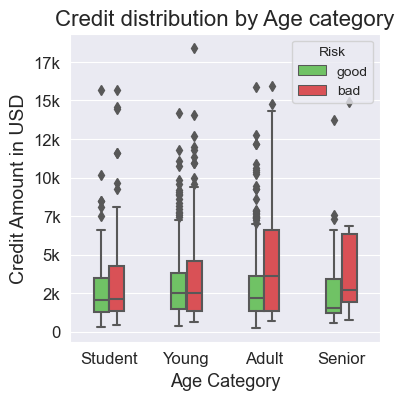

In [386]:
colors = {'good': '#64d156', 'bad': '#f03a41'}

plt.figure(figsize=(4,4))
sns.boxplot(df,x=df.Age_cat, y=df['Credit amount'], hue=df.Risk, palette=colors, width=0.4)

plt.title('Credit distribution by Age category', size=16)
plt.xlabel('Age Category', size=13)
plt.ylabel('Credit Amount in USD', size=14)

def format_yaxis_labels(value, pos):
    if value >= 1000:
        val = int(value) // 1000
        return f'{val}k'
    else:
        return str(int(value))

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_labels))


plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

plt.savefig('Credit distribution by Age category.jpg', format='jpg', dpi=100,bbox_inches='tight')
# Show the plot
plt.show()




In [363]:
df_bad.Housing.value_counts()

own     186
rent     70
free     44
Name: Housing, dtype: int64

In [364]:
df_bad.Housing.value_counts()
df_bad=df_bad['Housing'].value_counts().reset_index()
df_good=df_good['Housing'].value_counts().reset_index()
df_bad

,index,Housing
0,own,186
1,rent,70
2,free,44


In [365]:
df_bad.columns = ['Housing', 'Count']
df_good.columns = ['Housing', 'Count']
df_good

,Housing,Count
0,own,527
1,rent,109
2,free,64


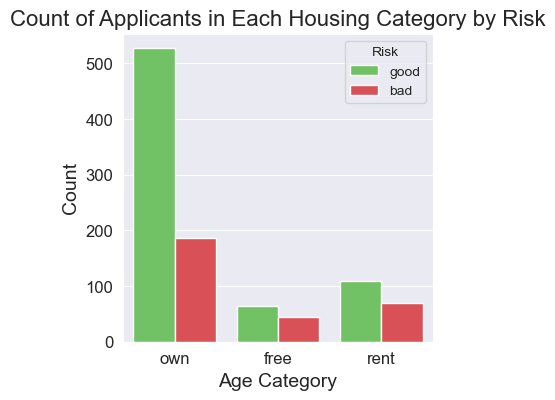

In [382]:
plt.figure(figsize=(4, 4))

sns.countplot(data=df, x='Housing', hue='Risk', palette={'good': '#64d156', 'bad': '#f03a41'})

plt.xlabel('Age Category', size=14)
plt.ylabel('Count', size=14)
plt.title('Count of Applicants in Each Housing Category by Risk', size=16)
plt.legend(title='Risk')


plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.savefig('Count of Applicants in Each Housing Category by Risk.jpg', format='jpg', dpi=100,bbox_inches='tight')
plt.show()


TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'size'

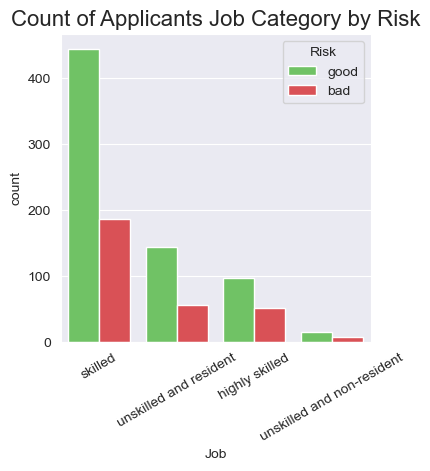

In [383]:
plt.figure(figsize=(4,4))

sns.countplot(data=df, x='Job', hue='Risk', palette={'good': '#64d156', 'bad': '#f03a41'})
plt.xticks(rotation=30)
plt.title('Count of Applicants Job Category by Risk', size=16)
plt.savefig('Count of Applicants Job Category by Risk.jpg', format='jpg', dpi=100,bbox_inches='tight', size= 14)
plt.xlabel('Job Skilled Category', size = 14)


plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
;

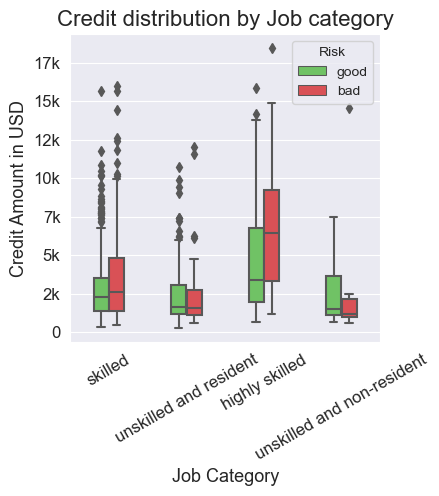

In [384]:
plt.figure(figsize=(4,4))
colors = {'good': '#64d156', 'bad': '#f03a41'}

sns.boxplot(df,x=df.Job, y=df['Credit amount'], hue=df.Risk, palette=colors, width=0.4)

plt.title('Credit distribution by Job category', size=16)
plt.xlabel('Job Category', size=13)
plt.ylabel('Credit Amount in USD', size=13)


plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)

def format_yaxis_labels(value, pos):
    if value >= 1000:
        val = int(value) // 1000
        return f'{val}k'
    else:
        return str(int(value))

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_labels))



plt.xticks(rotation=30)

plt.savefig('Credit distribution by Job category.jpg', format='jpg', dpi=100,bbox_inches='tight')
# Show the plot
plt.show()

In [369]:
df_good=df[df.Risk=='good']
df_bad=df[df.Risk=='bad']

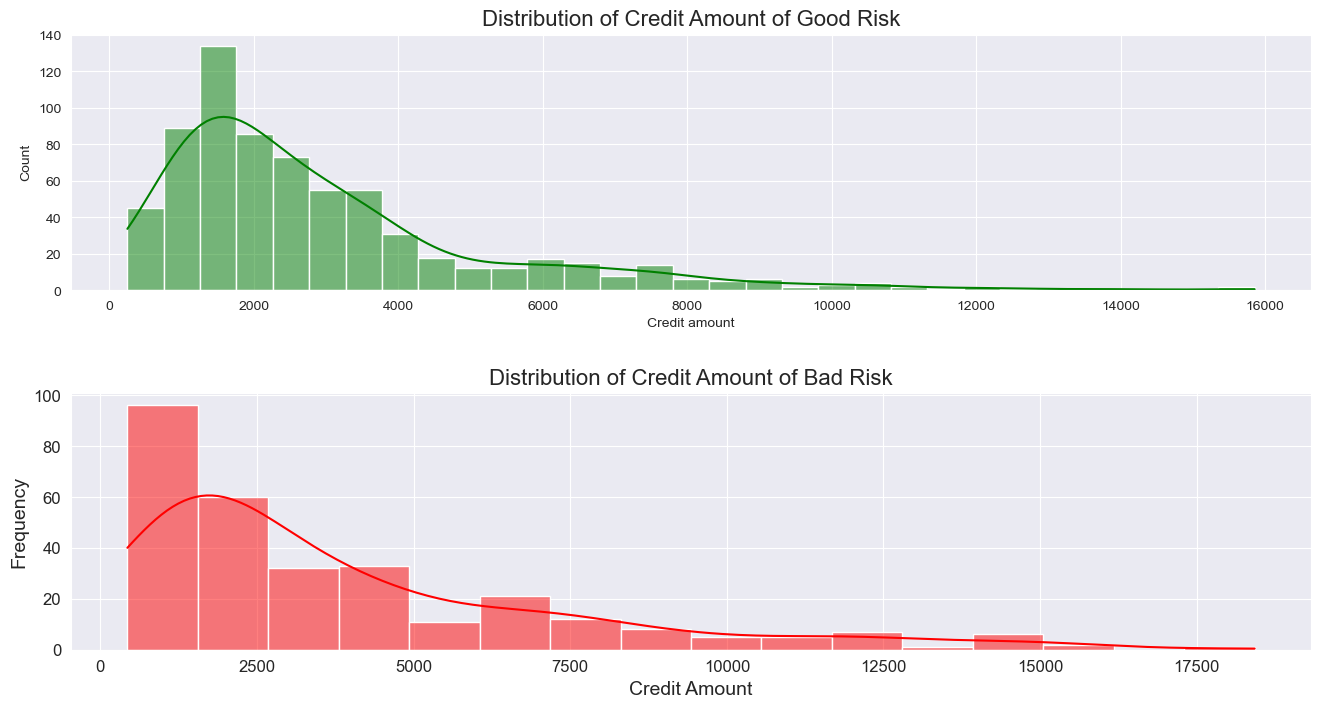

In [385]:
fig, axes = plt.subplots(2,1, figsize=(16,8))

# Assuming df is your DataFrame
sns.histplot(data=df_good, x='Credit amount',kde=True,ax=axes[0], color='green')

plt.xlabel('Credit Amount',size=14)
plt.ylabel('Frequency',size=14)
axes[0].set_title('Distribution of Credit Amount of Good Risk', size=16)  # Corrected title setting

plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)


sns.histplot(data=df_bad, x='Credit amount', kde=True, ax=axes[1], color='red')

axes[1].set_title('Distribution of Credit Amount of Bad Risk', size=16)


plt.subplots_adjust(hspace=0.4)



plt.savefig('Count of Credit distribution.jpg', format='jpg', dpi=100,bbox_inches='tight')

plt.show()

In [371]:
import pandas as pd

# Assuming df is your DataFrame
new_df = df['Purpose'].value_counts().reset_index()
new_df.columns = ['Purpose', 'Count']

new_df2 = df.groupby('Purpose')['Credit amount'].mean().reset_index()

merged_df = pd.merge(left=new_df, right=new_df2, on='Purpose')

merged_df['Credit amount'] = merged_df['Credit amount'].round(2)

merged_df


,Purpose,Count,Credit amount
0,car,337,3768.19
1,radio/TV,280,2487.65
2,furniture/equipment,181,3066.99
3,business,97,4158.04
4,education,59,2879.20
5,repairs,22,2728.09
6,domestic appliances,12,1498.00
7,vacation/others,12,8209.33


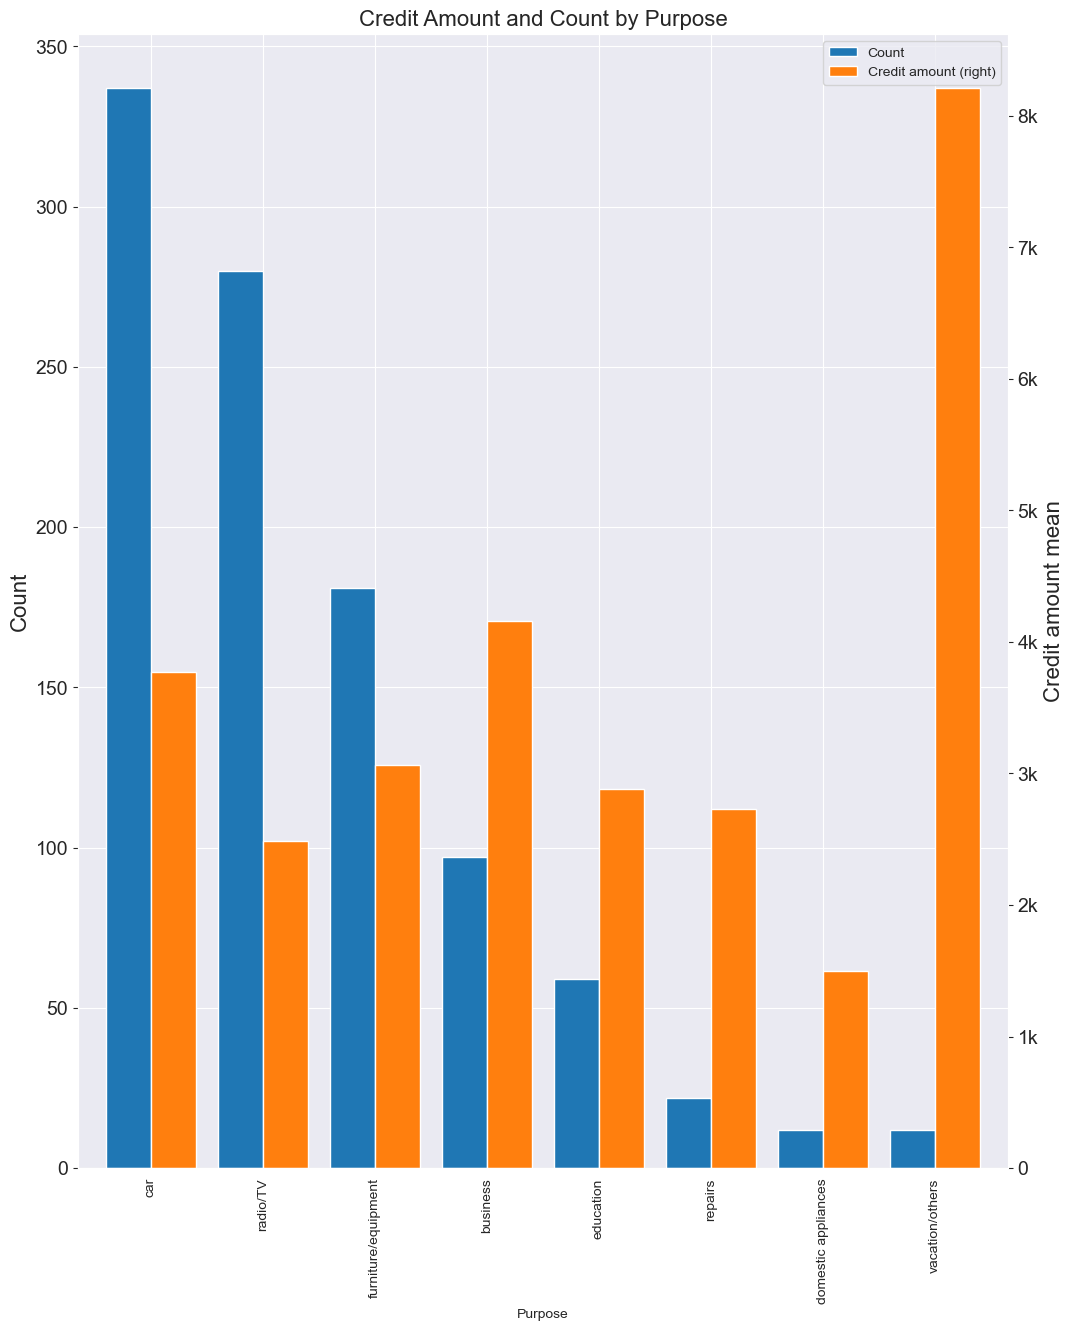

In [372]:
ax = merged_df.set_index('Purpose').plot.bar(secondary_y='Credit amount', figsize=(12, 6), width=0.8)

ax.set_ylabel('Count', size=16)
ax.right_ax.set_ylabel('Credit amount mean', size=16)

plt.title('Credit Amount and Count by Purpose', size=16)

plt.subplots_adjust(top=2)

def format_yaxis_labels(value, pos):
    if value >= 1000:
        val = int(value) // 1000
        return f'{val}k'
    else:
        return str(int(value))

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_labels))

ax.tick_params(axis='y', labelsize=14)
ax.right_ax.tick_params(axis='y', labelsize=14)
plt.xticks(rotation=30)

plt.savefig('Credit Amount and Count by Purpose.jpg', format='jpg', dpi=100,bbox_inches='tight')
plt.show()
